1. Reading the CSV File:
- Load the provided CSV file into a pandas DataFrame.
- Display the first 5 rows of the DataFrame to understand the structure of the data

In [10]:
import pandas as pd

# Load in CSV
acc_players_df = pd.read_csv('acc_players-2324F.csv', encoding='latin-1', skiprows=1)

print("2023-24 ACC basketball season:", ' \n')
acc_players_df.head()

2023-24 ACC basketball season:  



,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


2. Basic Analysis:
- Calculate the total points scored by all players combined.
- Find the player who has played the most minutes (MP).
- Identify the top 5 players in terms of total rebounds (TRB)

In [17]:
# Calculate total points scored by all players
total_points = acc_players_df['PTS'].sum()

print("Total points scored by all players:", total_points)

Total points scored by all players: 38411


In [25]:
# Find the player who has played the most minutes (MP)
player_with_most_minutes = acc_players_df[['Player', 'MP']].sort_values(by='MP', ascending=False).head(1)

print("Player with the most minutes played:", '\n')
print(player_with_most_minutes[['Player', 'MP']])


Player with the most minutes played: 

            Player    MP
135  Casey Morsell  1333


In [20]:
# Identify the top 5 players in terms of total rebounds (TRB)
top_5_rebounds = acc_players_df[['Player', 'TRB']].sort_values(by="TRB", ascending=False).head(5)
print("Top 5 players in terms of total rebounds: \n")
print(top_5_rebounds)
print("\n")

Top 5 players in terms of total rebounds: 

              Player  TRB
5      Armando Bacot  380
178  Ian Schieffelin  340
90   Harrison Ingram  327
44    Mohamed Diarra  311
149    Norchad Omier  309




3. Player Filtering:
- Create a new DataFrame containing only players who played more than 500 minutes.
- From this filtered DataFrame, determine the player with the highest total assists (AST).
- Who are the top 3 Assist Leads in the League?
- Who are the top 3 Shot Blockers?

In [24]:
# new Dataframe with players who played > 500 minutes
filtered_df = acc_players_df[acc_players_df['MP'] > 500]
#print("Players who played more than 500 minutes: \n")
#print(filtered_df.head())

# player with highest total assists
highest_ast = filtered_df[['Player', 'AST']].sort_values(by='AST', ascending=False).head(1)
print("Player with the highest total assists (AST): \n")
print(highest_ast)

Player with the highest total assists (AST): 

          Player  AST
7  Reece Beekman  212


In [26]:
# top 3 assist leads in the league
top_3_assist_leads = acc_players_df[['Player', 'AST']].sort_values(by='AST', ascending=False).head(3)
print("Top 3 assist leads in the league: \n")
print(top_3_assist_leads)

Top 3 assist leads in the league: 

             Player  AST
7     Reece Beekman  212
215  Jaeden Zackery  152
21    Elliot Cadeau  150


In [27]:
# Who are the top 3 Shot Blockers?
top_3_shot_blockers = acc_players_df[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)
print("Top 3 shot blockers: \n")
print(top_3_shot_blockers)

Top 3 shot blockers: 

            Player  BLK
51       Ryan Dunn   77
157   Quinten Post   61
5    Armando Bacot   56


4. School-Based Analysis:
- Group the players by School and calculate the total points scored by each school.
- Group the players by School and calculate the total assists (AST) for each team.
- Sort the schools by total points scored and display the top 3 schools

In [28]:
# Group the players by School and calculate the total points scored by each school.

school_points = acc_players_df.groupby('School')['PTS'].sum()

print("Total points scored by each school: \n")
print(school_points)

Total points scored by each school: 

School
Boston College    2667
Clemson           2785
Duke              2830
Florida State     2526
Georgia Tech      2272
Louisville        2304
Miami (FL)        2424
NC State          3101
North Carolina    3032
Notre Dame        2113
Pittsburgh        2495
Syracuse          2442
Virginia          2140
Virginia Tech     2547
Wake Forest       2733
Name: PTS, dtype: int64


In [29]:
# Group the players by School and calculate the total assists (AST) for each team.

school_assists = acc_players_df.groupby('School')['AST'].sum()

print("Total assists (AST) for each team: \n")
print(school_assists)

Total assists (AST) for each team: 

School
Boston College    509
Clemson           533
Duke              551
Florida State     406
Georgia Tech      425
Louisville        356
Miami (FL)        454
NC State          536
North Carolina    536
Notre Dame        335
Pittsburgh        452
Syracuse          442
Virginia          509
Virginia Tech     514
Wake Forest       429
Name: AST, dtype: int64


In [30]:
# Sort the schools by total points scored and display the top 3 schools

top_three_schools = acc_players_df.groupby('School')['PTS'].sum().sort_values(ascending=False).head(3)

print("Top 3 schools by total points scored: \n")
print(top_three_schools)

Top 3 schools by total points scored: 

School
NC State          3101
North Carolina    3032
Duke              2830
Name: PTS, dtype: int64


5. Extra Credit (Bonus):
- Create a bar chart showing the top 5 players by total points scored (PTS).
- Correlation: Investigate whether there is any correlation between a player's field goal
percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the
correlation coefficient.

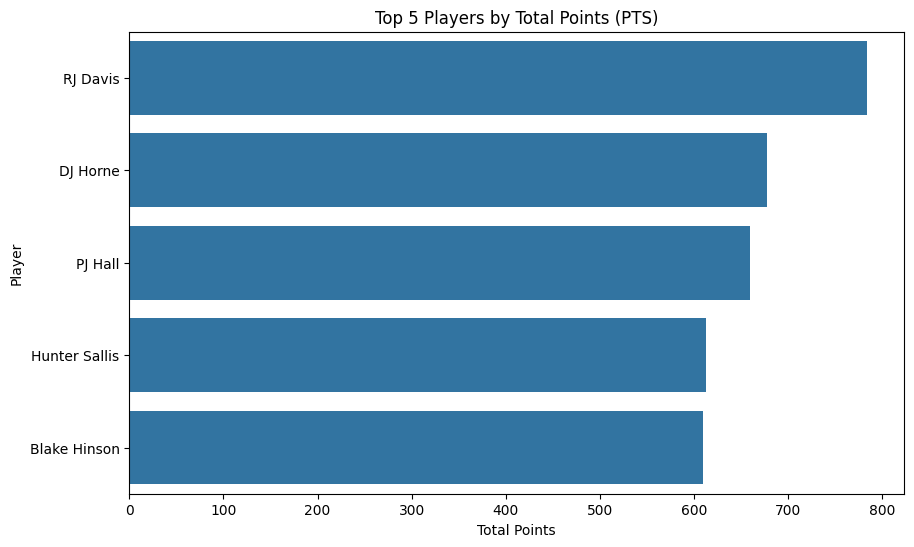

In [31]:
# Create a bar chart showing the top 5 players by total points scored (PTS).
import matplotlib.pyplot as plt
import seaborn as sns

top_5_players = acc_players_df[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='PTS', y = 'Player', data = top_5_players)
plt.title('Top 5 Players by Total Points (PTS)')
plt.xlabel('Total Points')
plt.ylabel('Player')
plt.show()

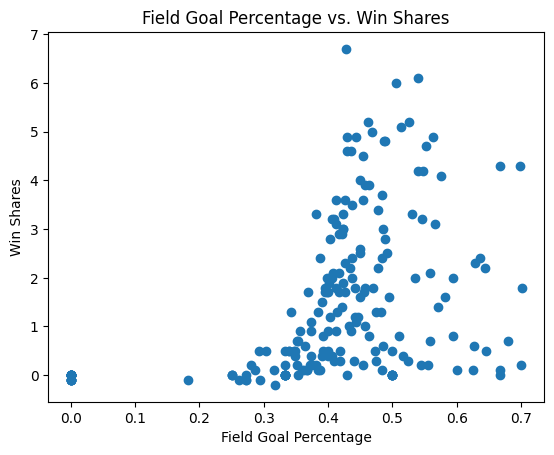

Correlation coefficient between FG% and WS: 0.4210663894199787


In [34]:
# Correlation: Investigate whether there is any correlation between a player's
# field goal percentage (FG%) and their win shares (WS). Provide a scatter plot
# and calculate the correlation coefficient.

correlation = acc_players_df['FG%'].corr(acc_players_df['WS'])

plt.scatter(acc_players_df['FG%'], acc_players_df['WS'])
plt.title('Field Goal Percentage vs. Win Shares')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Shares')
plt.show()

print("Correlation coefficient between FG% and WS:", correlation)


# Paragraph Reflection

This assignment helped develop my skills in reading in and filtering diverse sets of data using Pandas. The two CSV's that we had worked on for the lab were similar, but required a different approach for some of the queries. These skills are highly relevant in data analysis generally, but in specific projects, are essential for querying data for any specific subset of information. Reading in CSV's using Pandas in the lab and in this assignment helped to build a strong foundation for more complex queries in the future as well with potentially more complicated dataframes.

What I found to be the most challenging aspect of this assignment was creating the scatterplot and finding the correlation coefficient using the matplotlib library. However, by looking up examples and looking through different tutorials, I understood the process better and was able to apply it to the Field Goal Percentages and Win Shares in the dataset. The resource that I used is from ["Matplotlib Scatter"](https://www.w3schools.com/python/matplotlib_scatter.asp).
I also found it difficult to translate some of the basketball terms to their representations in the CSV file; however, I resolved the confusion by researching the common abbreviations for the specific terms.

The insights I gained from analyzing ACC basketball statistics can be utilized in different datasets that are a part of each and every industry. The abililities to read, filter, and manipulate data are all crucial for overcoming data science challenges. Whether the challenge is to unify a decentralized dataset or to tidy up a disorganized, inconsistent dataset, having a good understanding of these tools is important to solving it and preventing any future data inconveniences. This experience overall has prepared me for future data science challenges by enhancing my understanding of the basics and preparing me for more complex analyses like data transformations and optimization.